<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/Qiskit_ibm_runtime_Estimator_Primitive_mkbahk_20241008.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
### Qiskit 설치: Windows, 클라우드 환경 ###
%pip install qiskit[visualization]==1.1.0
%pip install qiskit-ibm-runtime
%pip install qiskit-aer

In [70]:
%pip show qiskit qiskit-ibm-runtime qiskit-aer

Name: qiskit
Version: 1.1.0
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer, qiskit-ibm-runtime
---
Name: qiskit-ibm-runtime
Version: 0.30.0
Summary: IBM Quantum client for Qiskit Runtime.
Home-page: https://github.com/Qiskit/qiskit-ibm-runtime
Author: Qiskit Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: ibm-platform-services, numpy, pydantic, python-dateutil, qiskit, requests, requests-ntlm, urllib3, websocket-client
Required-by: 
---
Name: qiskit-aer
Version: 0.15.1
Summary: Aer - High performance simulators for 

In [80]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.circuit.library import IQP
from qiskit.quantum_info import SparsePauliOp
from qiskit_ibm_runtime import QiskitRuntimeService, Session, SamplerV2 as Sampler, EstimatorV2 as Estimator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager # import the function from its respective module.
from qiskit_aer import AerSimulator

In [81]:
backend = AerSimulator()

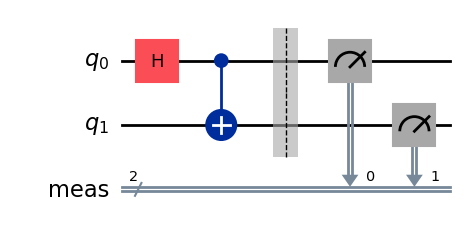

In [83]:
# Define a simple circuit
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure_all()
circuit.draw("mpl") # Changed 'circukt' to 'circuit'

In [74]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
isa_circuit = pm.run(circuit)

In [75]:
# The ZZ applies a Z operator on qubit 0, and a Z operator on qubit 1
ZZ = SparsePauliOp('ZZ')

# The ZI applies a Z operator on qubit 0, and an Identity operator on qubit 1
ZI = SparsePauliOp('ZI')

# The IX applies an Identity operator on qubit 0, and an X operator on qubit 1
IX = SparsePauliOp('IX')

### Write your code below here ###
### Follow the same naming convention we used above

### SOLUTION
IZ = SparsePauliOp('IZ')
XX = SparsePauliOp('XX')
XI = SparsePauliOp('XI')

## Don't change any code past this line, but remember to run the cell.

observables = [IZ, IX, ZI, XI, ZZ, XX]


In [76]:
#sampler = Sampler(backend)
#job = sampler.run([isa_circuit])
#result = job.result()

In [77]:
# Set up the Estimator
estimator = Estimator(backend)

# Submit the circuit to Estimator
pub = (isa_circuit, observables)

job = estimator.run(pubs=[pub])

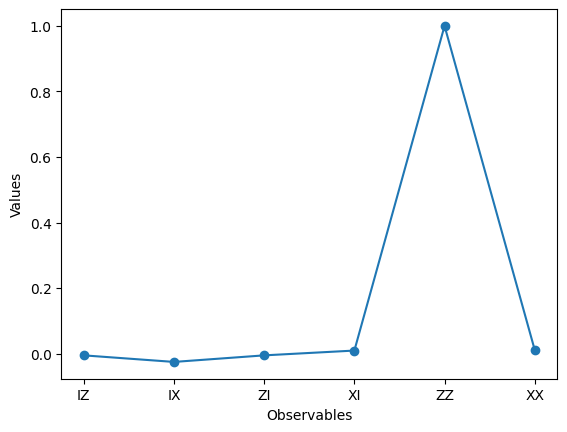

In [78]:
import matplotlib.pyplot as plt

# Collect the data
data = ['IZ', 'IX', 'ZI', 'XI', 'ZZ', 'XX']
values = job.result()[0].data.evs

# Set up our graph
container = plt.plot(data, values, '-o')

# Label each axis
plt.xlabel('Observables')
plt.ylabel('Values')

# Draw the final graph
plt.show()

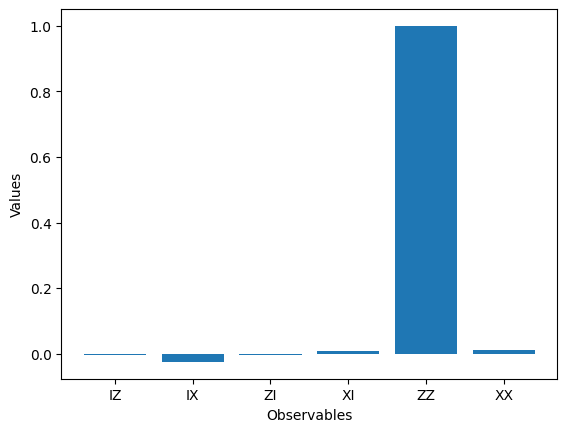

In [79]:
container = plt.bar(data, values, width=0.8)

plt.xlabel('Observables')
plt.ylabel('Values')

plt.show()